# <center>ECSE 415 - Assignment 2</center>
  ### <center>Patrick Erath - 260719203 </center>

# Question3 - Object Detection

## 3.1 - Training

### 3.1.1 - Resize Images

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

images = []

# TODO: check if grayscale is correct for HoG

# Read in each image, convert to Gray and resize, then append to list
for i in range(1,15):
    img_temp = cv2.imread("./car"+str(i)+".jpg")
    img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY) 
    img_temp = cv2.resize(img_temp, (128,128))
    images.append(img_temp)

### 3.1.2 - Compute HoG features

In [3]:
# Make a function which takes list of images as arguments
# and delivers list of HoG features as output. 

def hog_features(imgs_arr, cell_size=(4,4), block_size=(2,2), nbins=9):
    hog_feats_arr = []
    count = 0
    for img in imgs_arr:
        # Check window size
        if(img.shape[0]%16!=0 or img.shape[1]%16!=0):
            raise Exception('Invalid Image Size')
        else:
            # Compute window size
            win_XY = img.shape[0] // cell_size[0] * cell_size[1]
            
            # Compute blocks
            block_XY = block_size[0] * cell_size[0]
            
            # Create HoG object
            hog = cv2.HOGDescriptor(_winSize = (win_XY, win_XY),
                                    _blockSize = (block_XY, block_XY),
                                    _blockStride = (cell_size[1], cell_size[0]),
                                    _cellSize = (cell_size[1], cell_size[0]),
                                    _nbins = nbins
                                   )
            
            # Compute number of cells 
            n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
            
            # Compute HoG features
            hog_feats = hog.compute(img) \
                            .reshape(n_cells[1] - block_size[1] + 1,
                                     n_cells[0] - block_size[0] +1, 
                                     block_size[1], block_size[0], nbins) \
                            .transpose((1, 0, 3, 2, 4))
            
            hog_feats_arr.append(hog_feats)
            
    return hog_feats_arr
            
feats = hog_features(images)

### 3.1.3 - Calculate mean feature map across training images

In [4]:
# Map the HoGs
# Do we iterate over each HoG and take the average??

# Sum the features of the 14 trained images
feats_sum = feats[0] + feats[1] + feats[2] + feats[3] + feats[4] + feats[5] + feats[6] + feats[7] + feats[8]  \
            + feats[9] + feats[10] + + feats[11] + feats[12] + feats[13]

feats_mean = feats_sum / 14

### 3.1.4 - Repeat steps 3.1.2 - 3.1.3 for images flipped vertically

In [5]:
imgs_flip = []

# Flip image about the vertical axis -> ie across y-axis
for img in images:
    imgs_flip.append(cv2.flip(img, 1))
    
feats_flip = hog_features(imgs_flip)

# Sum the features of the 14 trained images
feats_sum = feats_flip[0] + feats_flip[1] + feats_flip[2] + feats_flip[3] + feats_flip[4] + feats_flip[5] \
            + feats_flip[6] + feats_flip[7] + feats_flip[8] + feats[9] + feats[10] + feats[11] \
            + feats[12] + feats[13]

feats_flip_mean = feats_sum / 14


### 3.1.5 - Display 9 orientation channels for first block

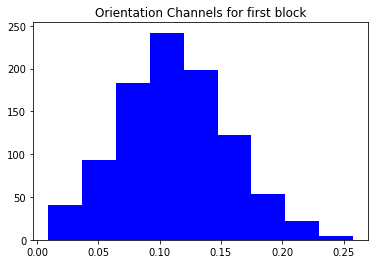

In [6]:
first_block = feats_mean[:, :, 0,0,0]

# Normalize array for display
normalized_array = np.reshape(first_block, (1,31*31))

# Display mean feature map with 9 orientation channels
plt.hist(normalized_array[0], 9, color='b')
plt.title("Orientation Channels for first block")
plt.show()

## 3.2 - Testing

### 3.2.1 - Extract overlapping windows from test image

In [7]:
import time # TODO: REMOVE

test_img = cv2.imread('test.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

# Step size is the "step" (or over lap) when sliding 
# an overlapping 128x128 window across the image
stepSize = 32
winX = (test_img.shape[1] // stepSize) * stepSize
winY = (test_img.shape[0] // stepSize) * stepSize

test_img = cv2.resize(test_img, (winX, winY))

windows_array = []

def sliding_window(image, stepSize, windowSize=(128,128)):
    # Sliding the window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


# 1. Create a sliding window by sliding a 128x128 window across the image
for (x, y, window) in sliding_window(test_img, stepSize):
    if window.shape[0] != 128 or window.shape[1] != 128:
        continue
    else:
        # Append the given window to a window array
        windows_array.append(window)

### 3.2.2 - Compute HoG features for each window 

In [8]:
# NOTE: Resizing the windows to 128x128 is not necessary because 
# a sliding window of 128x128 was used. Thus the windows are already
# of size 128x128

window_feats = hog_features(windows_array)

### 3.2.3 - Compute Euclidean Distance  

In [11]:
# Compute the euclidean distance between the feature map of each
# window and the mean feature map of training images

# For non-flipped images
euclidean_distance = []

#print(feats_mean)

### 3.2.4 - Threshold the distances

In [ ]:
#TODO

### 3.2.5 - Experiment with the size of the window, stride and detection threshold

In [12]:
#TODO

In [ ]:
# Iterate over each block (0,0), (0,1), (1,0) and (1,1)
# Iterate over each pixel, and find the average of that pixel for
# the 14 trained image
# Final array is a nested array with the average pixel for each block
for l in range(2):
    for k in range(2):
        block_avg = np.zeros((height, width))
        for h in range(height):
            pixel_sum = 0
            for w in range(width):
                for i in range(len(feats)):
                    pixel_sum = feats[i][:,:,k,l,0][h][w]
                pixel_avg = pixel_sum / (len(feats))
                block_avg[w][h]= pixel_avg
                
        blocks_avg.append(block_avg)